In [6]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [7]:
banking_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Data Exploration / Cleaning / Wrangling

In [8]:
df_orig = pd.DataFrame(banking_data)
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- Info is used to understand the shape of dataset and columns and their datatype.
- We observe that we have ID column which is irrelevant for classification algorithm.

In [9]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- We also observe that there are certain YORN (contains only yes and no values /1 or 0) columns which have integer value, converting them into categorical for time being.

In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- Just by looking at the mean we understand that there are less customers who have credit card issued by Universal Bank in last campaign.
- Extremely less number of customers have engaged in - Taking personal loan in the previous drive, Number of customers with CD account are also extremely less.
- There are more than 50% customers who use Online facility
- We can observe that for experience we have negative values which is not correct and needs to be handled

In [11]:
df.rename(columns= {"ZIP Code": "zip_code", "Personal Loan" : "Personal_loan",
                    "Securities Account" : "Securities_account", "CD Account" : "CD_account"},inplace=True)

# Multivariate analysis

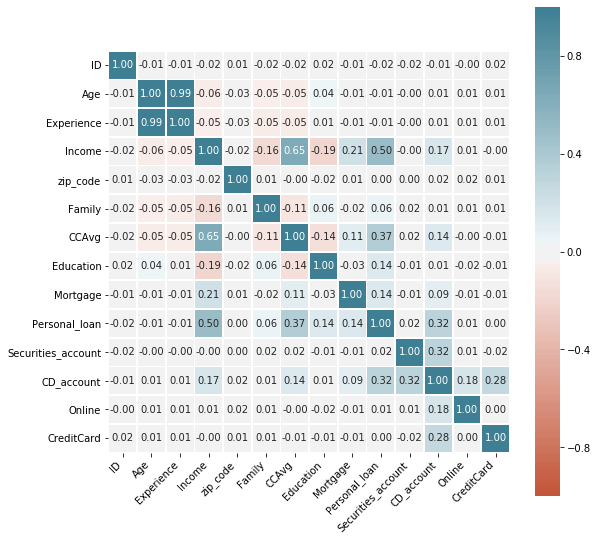

In [12]:
corr = df.corr()
plt.figure(figsize=(9,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, fmt='.2f', annot_kws={'size': 10},
    linewidths=0.8
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- Correlation between age and experience is too high. We may further analyse and drop one of them while going ahead with model building
- We can see income and ccavg also positively correlated
- There is moderate correlation between personal loan and income

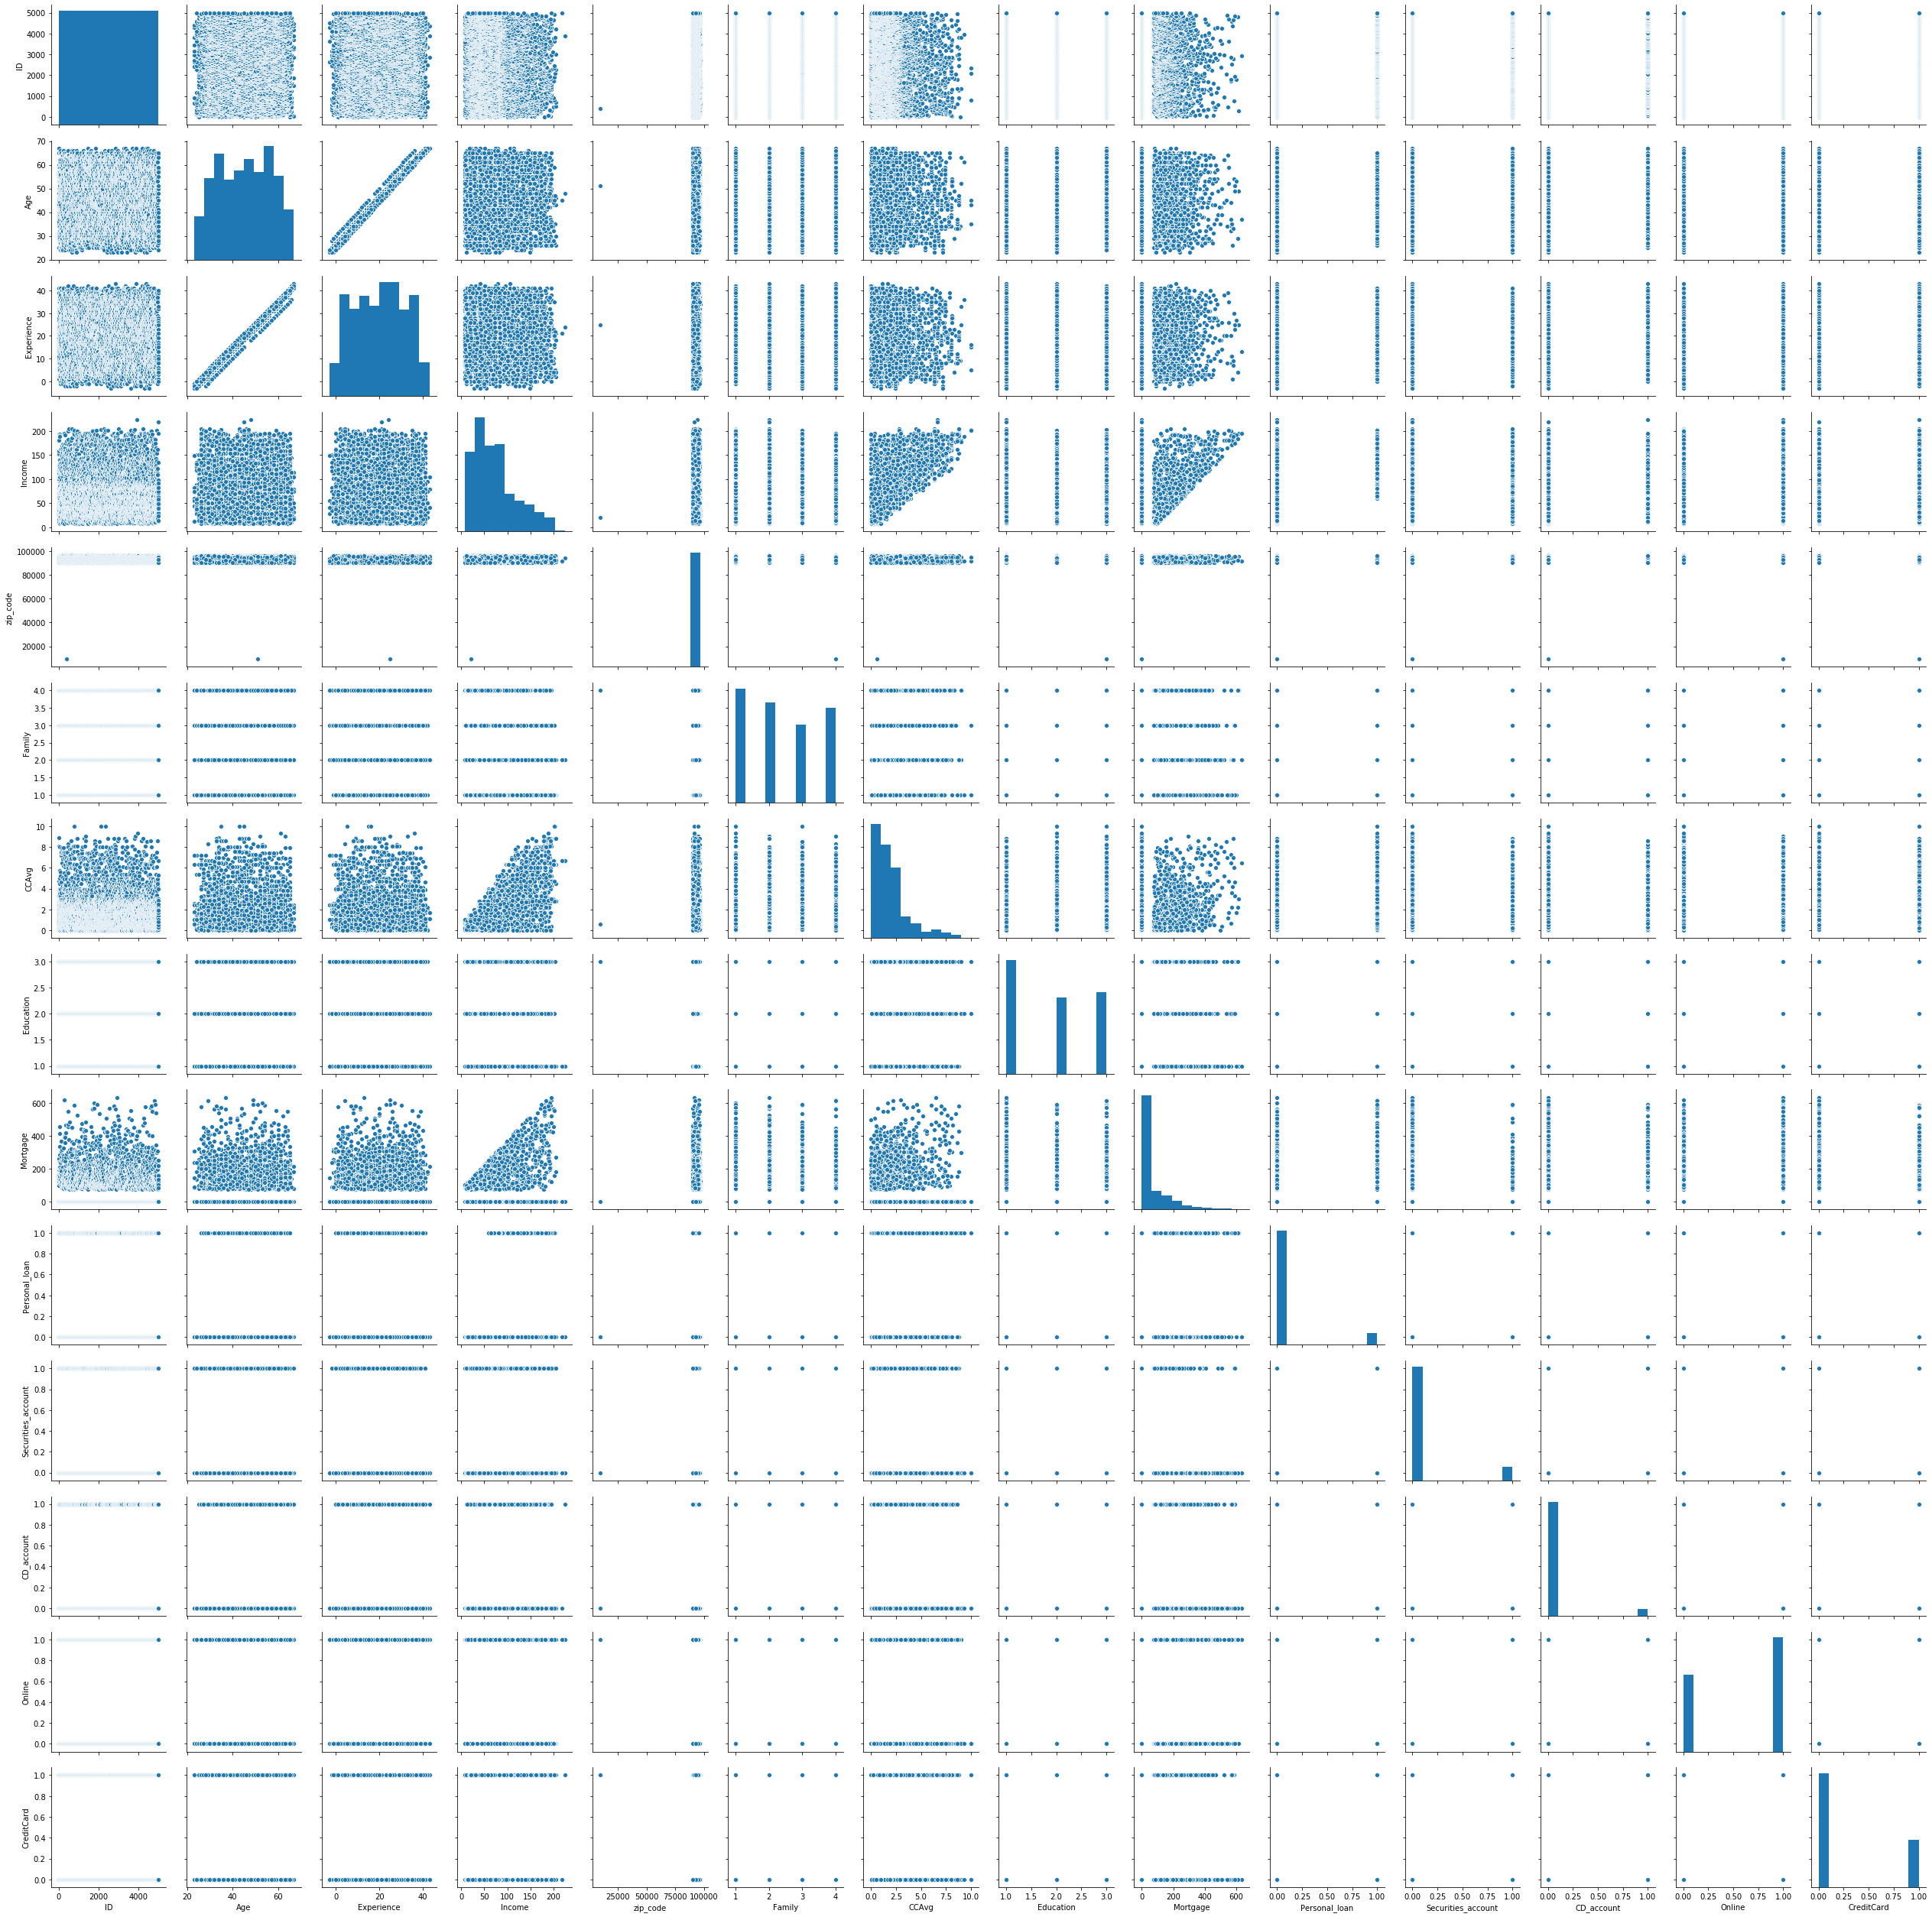

In [13]:
sns.pairplot(df)

# Perparing data

In [14]:
df = df.drop(["ID"],axis=1)
int_to_cat = ["Education","Personal_loan","Securities_account","CD_account","Online","CreditCard"]
df[int_to_cat] = df[int_to_cat].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
zip_code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal_loan         5000 non-null category
Securities_account    5000 non-null category
CD_account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(6), float64(1), int64(6)
memory usage: 303.4 KB


- Handling incorrect values 

In [15]:
df[df["Experience"]<0].shape

(52, 13)

In [16]:
df[df["Experience"]==1]["Income"].max()
#We can say that the error here is only negative sign in 52 records.

190

In [17]:
#Taking absolute to avoid negative values
df["Experience"] = abs(df["Experience"])

In [18]:
df.isna().apply(pd.value_counts)

,Age,Experience,Income,zip_code,Family,CCAvg,Education,Mortgage,Personal_loan,Securities_account,CD_account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


# Univariate Analysis

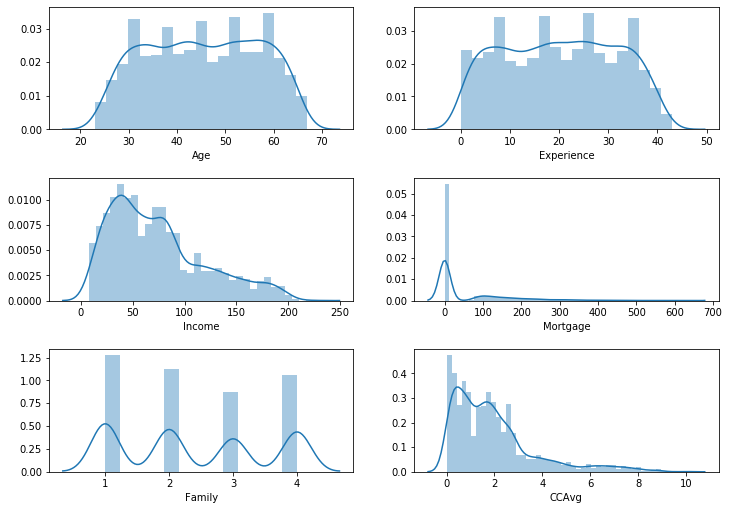

In [19]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.distplot(df["Age"])
plt.subplot(6,2,2)
sns.distplot(df["Experience"])
plt.subplot(6,2,3)
sns.distplot(df["Income"])
plt.subplot(6,2,4)
sns.distplot(df["Mortgage"])
plt.subplot(6,2,5)
sns.distplot(df["Family"])
plt.subplot(6,2,6)
sns.distplot(df["CCAvg"])
plt.subplots_adjust(hspace=0.4)
plt.show()

- Mortgage data is highly skewed 
- Age distribution is majorly between 30 and 60

In [20]:
df["zip_code"] =df.zip_code.astype('int64')

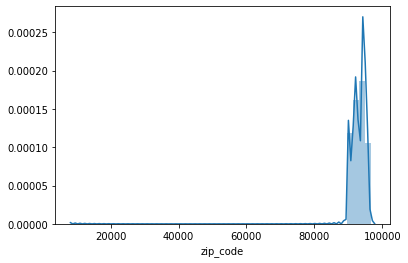

In [21]:
sns.distplot(df["zip_code"])

In [22]:
df[df["Online"]==1].shape

(2984, 13)

In [23]:
df.skew()

Age                   -0.029341
Experience            -0.010038
Income                 0.841339
zip_code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal_loan          2.743607
Securities_account     2.588268
CD_account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

- We observe high skewness in zipcode but it is mostly irrelevant so we may drop it while building model.

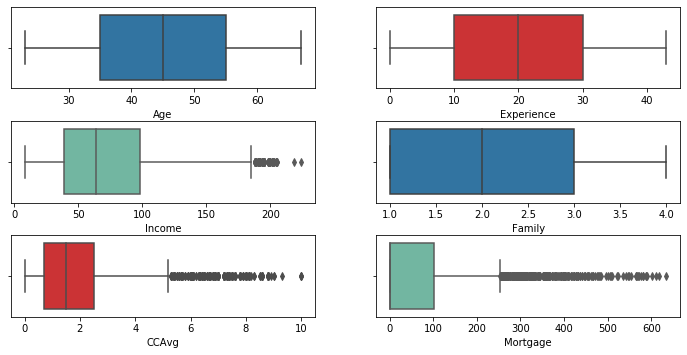

In [24]:
plt.figure(figsize= (12,12))
plt.subplot(6,2,1)
sns.boxplot(df["Age"])
plt.subplot(6,2,2)
sns.boxplot(df["Experience"], orient="h", palette="Set1")
plt.subplot(6,2,3)
sns.boxplot(df["Income"], orient="h", palette="Set2")
plt.subplot(6,2,4)
sns.boxplot(df["Family"])
plt.subplot(6,2,5)
sns.boxplot(df["CCAvg"], orient="h", palette="Set1")
plt.subplot(6,2,6)
sns.boxplot(df["Mortgage"], orient="h", palette="Set2")
plt.subplots_adjust(hspace=0.4)
plt.show()

- We observe outliers for income, mortgage and CCAvg but it is relavant data and we cannot ignore it

In [25]:
df["Personal_loan"].value_counts()

0    4520
1     480
Name: Personal_loan, dtype: int64

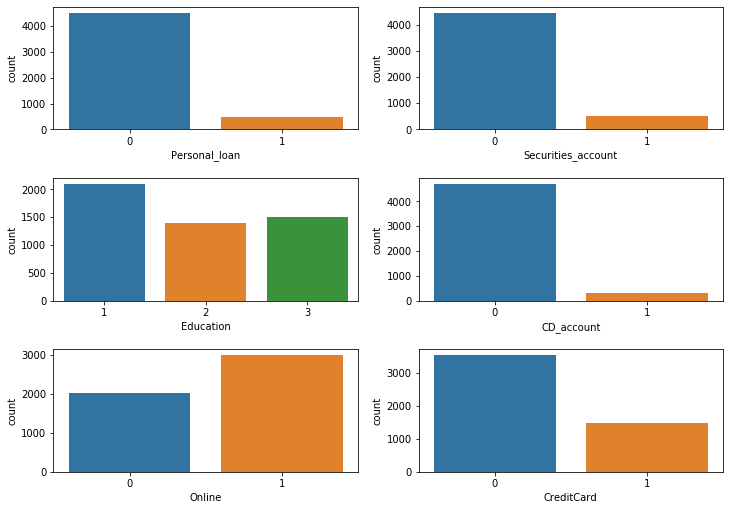

In [26]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.countplot(x="Personal_loan", data=df)
plt.subplot(6,2,2)
sns.countplot(x="Securities_account", data=df)
plt.subplot(6,2,3)
sns.countplot(x="Education", data=df)
plt.subplot(6,2,4)
sns.countplot(x="CD_account", data=df)
plt.subplot(6,2,5)
sns.countplot(x="Online", data=df)
plt.subplot(6,2,6)
sns.countplot(x="CreditCard", data=df)
plt.subplots_adjust(hspace=0.4)
p lt.show()

- There are more people who use Online facility
- Very less people have a securities account and a cd account and also who have taken personal loan.


# Bivariate Analysis with Target 

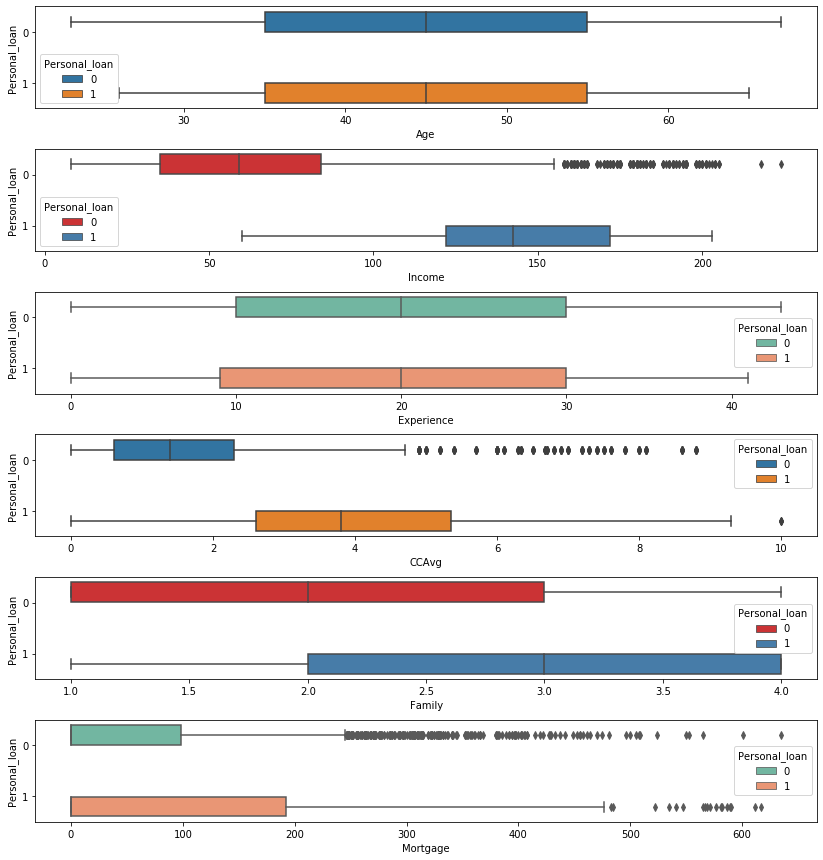

In [27]:
plt.figure(figsize= (14,15))
plt.subplot(6,1,1)
sns.boxplot(x="Age",y="Personal_loan",hue="Personal_loan",data=df)
plt.subplot(6,1,2)
sns.boxplot(x="Income",y="Personal_loan",hue="Personal_loan",data=df, orient="h", palette="Set1")
plt.subplot(6,1,3)
sns.boxplot(x="Experience",y="Personal_loan",hue="Personal_loan",data=df, orient="h", palette="Set2")
plt.subplot(6,1,4)
sns.boxplot(x="CCAvg",y="Personal_loan",hue="Personal_loan",data=df)
plt.subplot(6,1,5)
sns.boxplot(x="Family",y="Personal_loan",hue="Personal_loan",data=df, orient="h", palette="Set1")
plt.subplot(6,1,6)
sns.boxplot(x="Mortgage",y="Personal_loan",hue="Personal_loan",data=df, orient="h", palette="Set2")
plt.subplots_adjust(hspace=0.4)
plt.show()

- We can observe that majorly people with more incore say above 100 thousand dollar are likely to take personal loan
- The bigger the family size, more likly a customer may take loan
- The average spending pattern of a customer also says whether he/she will take personal loan or not. If it's more than 2 thousand dollars than it's likely that the customer may take loan.

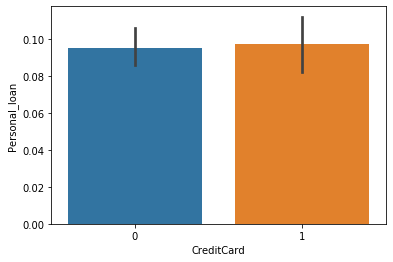

In [28]:
sns.barplot(x="CreditCard",y=df.Personal_loan.astype('int64'),data=df)

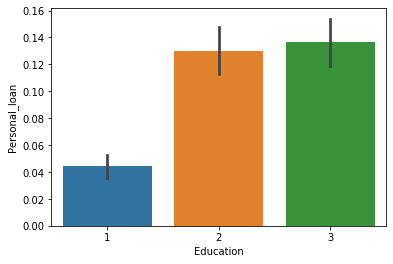

In [29]:
sns.barplot(x="Education",y=df.Personal_loan.astype('int64'),data=df)

- We observe that if a person is more educated then he may take loan

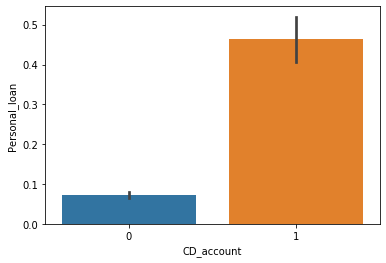

In [30]:
sns.barplot(x="CD_account",y=df.Personal_loan.astype('int64'),data=df)

- From the given data, we also observe that customers having CD_account are likely to take a loan.

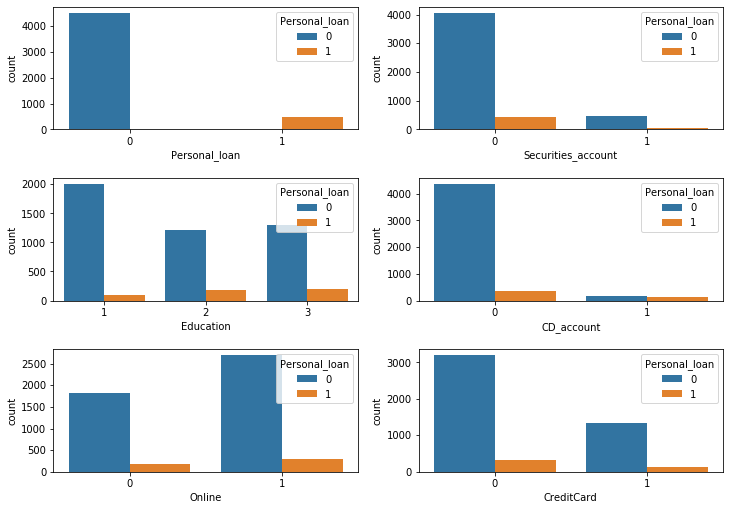

In [31]:
plt.figure(figsize=(12,18))
plt.subplot(6,2,1)
sns.countplot(x="Personal_loan",hue="Personal_loan", data=df)
plt.subplot(6,2,2)
sns.countplot(x="Securities_account",hue="Personal_loan", data=df)
plt.subplot(6,2,3)
sns.countplot(x="Education",hue="Personal_loan", data=df)
plt.subplot(6,2,4)
sns.countplot(x="CD_account",hue="Personal_loan",data=df)
plt.subplot(6,2,5)
sns.countplot(x="Online",hue="Personal_loan", data=df)
plt.subplot(6,2,6)
sns.countplot(x="CreditCard",hue="Personal_loan", data=df)
plt.subplots_adjust(hspace=0.4)
plt.show()

In [32]:
pd.pivot_table(data=df,index="Personal_loan",values="Online",aggfunc={"Online":len}) #df["CreditCard"].value_counts()

,Online
Personal_loan,
0,4520
1,480


In [63]:
# Absolute correlation of independent variables with 'Personal Loan' i.e. the target variable
absCorrwithDep = []
allVars = df.drop('Personal_loan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(df['Personal_loan'].corr(df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
2,Income,0.502462
5,CCAvg,0.366889
9,CD_account,0.316355
7,Mortgage,0.142095
6,Education,0.136722
4,Family,0.061367
8,Securities_account,0.0219539
1,Experience,0.00830387
0,Age,0.00772562
10,Online,0.00627782


- We will dorp last 4 columns since there is barely any correlation.


# Split data in 70:30 using train_test_split

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

from sklearn.naive_bayes import GaussianNB

In [230]:
df_ml = df.copy()

attrib_2=['Personal_loan','Education','Securities_account','CD_account','Online','CreditCard']
df_ml[attrib_2]=df_ml[attrib_2].astype('int64')
df_ml.info()

X_data = df_ml.drop(columns=["Personal_loan","Age","Online","CreditCard","zip_code"])
Y_target = df_ml["Personal_loan"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
zip_code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_loan         5000 non-null int64
Securities_account    5000 non-null int64
CD_account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_target, test_size=0.3) #random_state=4

# Logistic Regression

In [244]:
logreg = LogisticRegression(solver='lbfgs',max_iter=1000)

#Train the model using the training sets
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(logreg.score(X_train, y_train))

#Checking performance our model with ROC Score.
roc_score = roc_auc_score(y_test, y_pred)
print("ROC: ",roc_score)

# Print Classification Report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
# Print Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9413333333333334
0.9502857142857143
ROC:  0.7916094322344323
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1344
           1       0.78      0.60      0.68       156

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500

[[1318   26]
 [  62   94]]


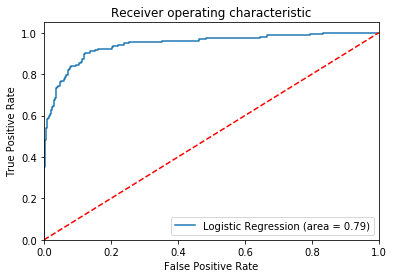

In [233]:
#ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Hyper Parameter tuning

In [234]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
#class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  #class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logreg,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    7.8s


Best Score:  0.9618463075831434
Best Params:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  89 out of  96 | elapsed:    8.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    8.7s finished


- Logistic regression based on hyper parameter tuning result

In [235]:
logreg_tuned = LogisticRegression(solver='liblinear',C=1 ,penalty='l1')

#Train the model using the training sets
logreg_tuned.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg_tuned.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(logreg_tuned.score(X_train, y_train))

#Checking performance our model with ROC Score.
roc_score = roc_auc_score(y_test, y_pred)
print("ROC: ",roc_score)

# Print Classification Report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
# Print Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9426666666666667
0.9502857142857143
ROC:  0.7951865842490843
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1344
           1       0.79      0.61      0.69       156

    accuracy                           0.94      1500
   macro avg       0.87      0.80      0.83      1500
weighted avg       0.94      0.94      0.94      1500

[[1319   25]
 [  61   95]]


- We observe that the accuract has increased.

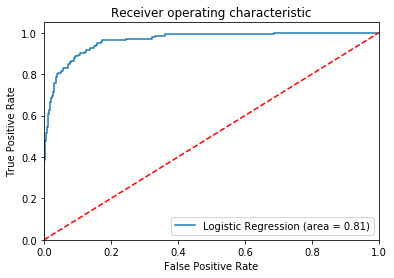

In [207]:
#ROC Curve

logit_roc_auc = roc_auc_score(y_test, logreg_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN Classifier

In [236]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(knn.score(X_train, y_train))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.9106666666666666
0.9425714285714286
ROC : 0.6611721611721612
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1344
           1       0.63      0.35      0.45       156

    accuracy                           0.91      1500
   macro avg       0.78      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500

[[1312   32]
 [ 102   54]]


- Hyper parameter tuning for best N neighbours

In [237]:
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
#p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors) #leaf_size=leaf_size, , p=p
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best n_neighbors: 2


- KNN based on best parameter

In [238]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(logreg.score(X_train, y_train))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.908
0.9482857142857143
ROC : 0.6143543956043956
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1344
           1       0.66      0.24      0.36       156

    accuracy                           0.91      1500
   macro avg       0.79      0.61      0.65      1500
weighted avg       0.89      0.91      0.89      1500

[[1324   20]
 [ 118   38]]


# Gaussian Naive Bayes

In [239]:
GNB1 = GaussianNB()

#Train the model using the training sets
GNB1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = GNB1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(GNB1.score(X_train, y_train))

#Checking performance our model with ROC Score.
print("ROC :",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy: 0.88
0.8891428571428571
ROC : 0.7262190934065934
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1344
           1       0.44      0.53      0.48       156

    accuracy                           0.88      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.89      0.88      0.89      1500

[[1237  107]
 [  73   83]]


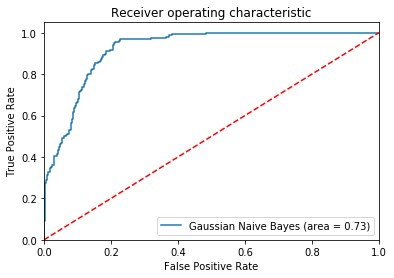

In [240]:
#ROC Curve

logit_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Conclusion

Metrics that can be calculated from confusion matrix:

The confusion matrix is another metric that is often used to measure the performance of a classification algorithm, which contains information about the actual and the predicted class.

Precision: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
Recall: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
f1-score: Harmonic mean of precision and recall.
Precision would tell us cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.
Recall would tell us cases where actually the personal was accepted by the customer but we predicted it as not accepted.

- In our case, it would be recall that would hold more importance then precision. So choosing recall and f1-score which is the harmonic mean of both precision and recall as evaluation metric, particularly for class 1

Also, AUC-ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.


## Model Selection

- We would go with KNN after tuning since the model score is 0.948 and the recall we observe is highest that is 0.99
